In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('../train.csv', index_col=0)

Our own decision tree! (well, an attempt...)

In [14]:
y = df['Survived'] #labels, true

ypred = [] #fill in this list of predictions with 1s (survived) and 0s 
for i, row in df.iterrows():
    
    if row['Sex'] == 'female': #are they a man or a woman?
        
        if row['Pclass'] < 3: #if it's a women, are they middle-class?
            
            
            if row['Parch'] < 4: # if it's a middle-class woman, do they have less than 4 children / 
                                 # parents?
                
                ypred.append(1)
                
            else:
                
                ypred.append(0)
            
        else:
            
            ypred.append(0)
            
            
    else:
        ypred.append(0)

In [15]:
print(accuracy_score(y, ypred))

0.7867564534231201


- Keeping track of branches is tough!
- how do we even now what question to ask??

### Luckily, there is a DecisionTree model already in sklearn that can figure out all of this hard brain work for us!

This is actually one of the newer approaches in machine learning!

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
m = DecisionTreeClassifier()

In [20]:
# X = [[ 1 for x in df['Sex'] if x == 'Male' else 0]]

In [22]:
df['Sex'].replace('female', 0, inplace=True)
df['Sex'].replace('male', 1, inplace=True)

In [34]:
X = df[['Pclass', 'SibSp', 'Parch']]
y = df['Survived']

In [35]:
m.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
m.score(X, y)

0.7216610549943884

In [37]:
from sklearn.tree import export_graphviz
import graphviz

tree = export_graphviz(m, out_file=None,
                class_names=["Dead", "Survived"],
                feature_names=['Passenger Class', 'Siblings & Spouses', 'Parents & Children'],
                impurity=False,
                filled=True)
open('titanic.dot', 'w').write(tree)

8659

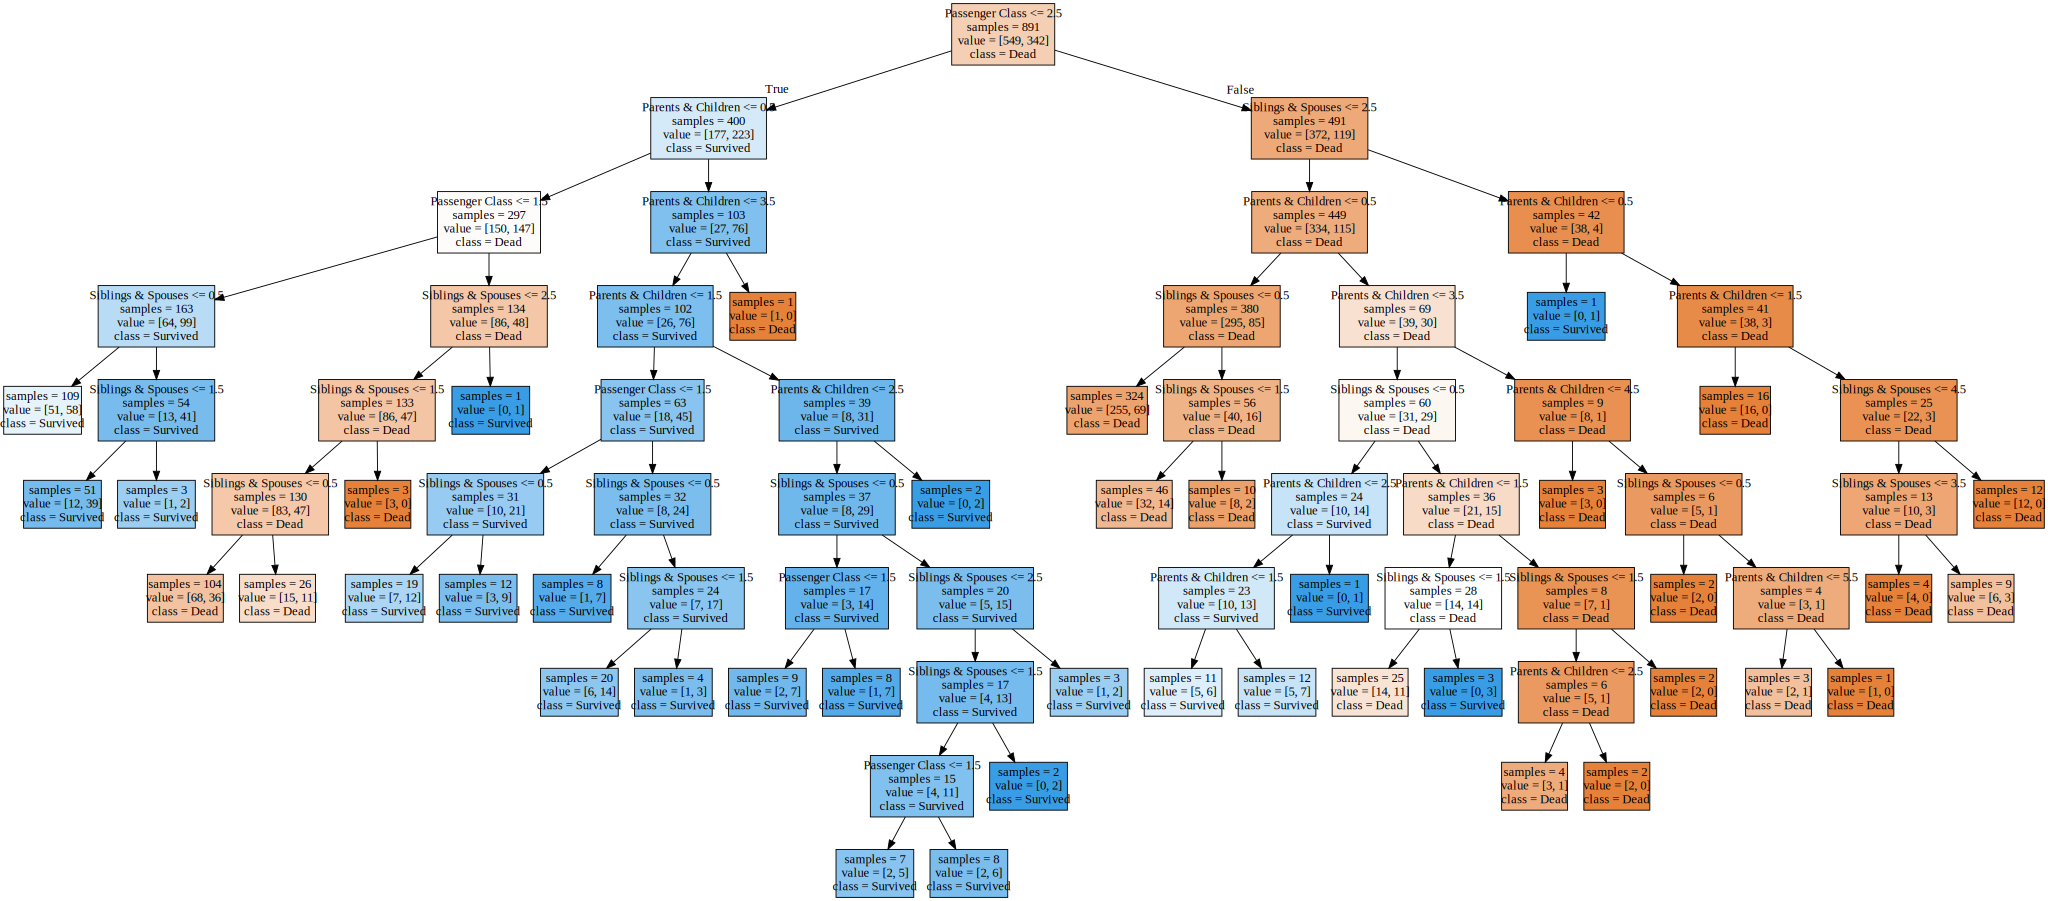

In [38]:
graph = graphviz.Source(tree)
graph.render('titanic')  # creates PDF
graph  # in Jupyter

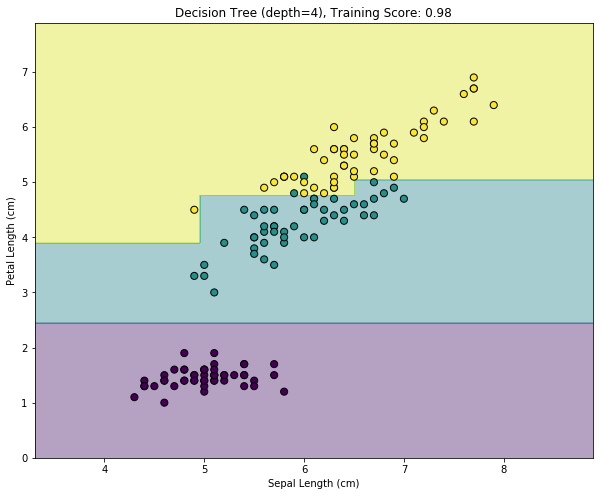

In [45]:
# Source code adapted (simplified) from Scikit-Learn website
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# © 2007 - 2019, scikit-learn developers (BSD License).

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# Loading some example data to play with
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Train a classification model
m = DecisionTreeClassifier(max_depth=4)
m.fit(X, y)

# What about other models? Try them here as well.

#step size in the mesh
h = 0.01

# Plotting decision regions
#For that, we will assign a color to each point in the mesh [x_min, x_max] * [y_min, y_max]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Xgrid = np.c_[xx.ravel(), yy.ravel()]
Z = m.predict(Xgrid)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

#plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title(f'Decision Tree (depth=4), Training Score: {round(m.score(X, y), 2)}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

In [42]:
tree = export_graphviz(m, out_file=None,
                class_names=["Species 1", "Species 2", "Species 3"],
                feature_names=['Sepal Length', 'Petal Length'],
                impurity=False,
                filled=True)
open('iris.dot', 'w').write(tree)

graph = graphviz.Source(tree)
graph.render('iris')  # creates PDF
# graph  # in Jupyter

'iris.pdf'